In [ ]:
#!pip install lingam
!pip install git+https://github.com/cdt15/lingam.git
import numpy as np
import lingam
import pandas as pd
from lingam.utils import make_dot
import os
os.chdir("/content/drive/MyDrive/projects/playground-series-s3e12/")

In [3]:
df = pd.read_csv("data/train.csv")
print(df.shape)
df.head()

(414, 8)


,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [8]:
# 帰無仮説は独立である
def check_noise(model, X):
    p_values = model.get_error_independence_p_values(X)
    return p_values

In [13]:
pd.options.display.float_format = '{:.3f}'.format

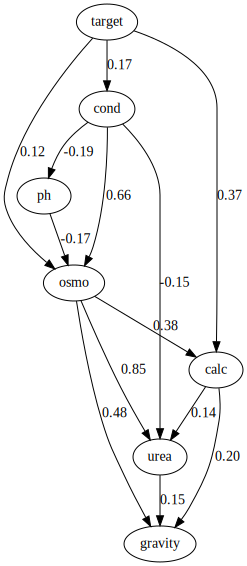

,gravity,ph,osmo,cond,urea,calc,target
0,0.000,0.270,0.000,0.000,0.003,0.000,0.098
1,0.270,0.000,0.542,0.000,0.006,0.135,0.497
2,0.000,0.542,0.000,0.000,0.000,0.010,0.361
3,0.000,0.000,0.000,0.000,0.218,0.000,0.000
4,0.003,0.006,0.000,0.218,0.000,0.005,0.258
5,0.000,0.135,0.010,0.000,0.005,0.000,0.000
6,0.098,0.497,0.361,0.000,0.258,0.000,0.000


In [14]:
use_columns = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target']

use_df = df[use_columns]

norm_df = (use_df - use_df.mean(axis=0)) / use_df.std(axis=0)

model_lingam = lingam.DirectLiNGAM()
model_lingam.fit(norm_df)
display(make_dot(model_lingam.adjacency_matrix_, labels=use_columns))

display(pd.DataFrame(check_noise(model_lingam, norm_df), columns=use_columns))

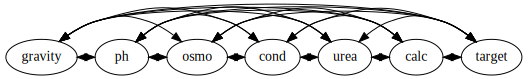

,gravity,ph,osmo,cond,urea,calc,target
0,0.000,0.270,0.000,0.000,0.003,0.000,0.098
1,0.270,0.000,0.542,0.000,0.006,0.135,0.497
2,0.000,0.542,0.000,0.000,0.000,0.010,0.361
3,0.000,0.000,0.000,0.000,0.218,0.000,0.000
4,0.003,0.006,0.000,0.218,0.000,0.005,0.258
5,0.000,0.135,0.010,0.000,0.005,0.000,0.000
6,0.098,0.497,0.361,0.000,0.258,0.000,0.000


In [15]:
# BottomUpParceLiNGAM
model_bup = lingam.BottomUpParceLiNGAM()
model_bup.fit(norm_df)

display(make_dot(model_bup.adjacency_matrix_, labels=use_columns))
display(pd.DataFrame(check_noise(model_lingam, norm_df), columns=use_columns))

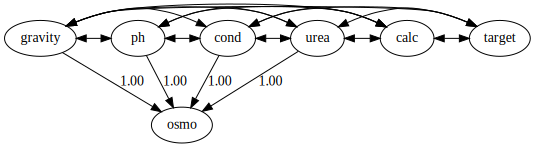

,gravity,ph,osmo,cond,urea,calc,target
0,0.000,0.270,0.000,0.000,0.003,0.000,0.098
1,0.270,0.000,0.542,0.000,0.006,0.135,0.497
2,0.000,0.542,0.000,0.000,0.000,0.010,0.361
3,0.000,0.000,0.000,0.000,0.218,0.000,0.000
4,0.003,0.006,0.000,0.218,0.000,0.005,0.258
5,0.000,0.135,0.010,0.000,0.005,0.000,0.000
6,0.098,0.497,0.361,0.000,0.258,0.000,0.000


In [16]:
# CAM-UV
model_cam = lingam.CAMUV()
model_cam.fit(norm_df)

display(make_dot(model_cam._adjacency_matrix, labels=use_columns))
display(pd.DataFrame(check_noise(model_lingam, norm_df), columns=use_columns))

In [21]:
# Bootstrap
model = lingam.DirectLiNGAM()
result = model.bootstrap(norm_df, n_sampling=100)

In [22]:
from lingam.utils import print_causal_directions, print_dagc, make_dot

# 多い組み合わせ
cdc = result.get_causal_direction_counts(n_directions=8, min_causal_effect=0.01, split_by_causal_effect_sign=True)
print_causal_directions(cdc, 100)

x5 <--- x6 (b>0) (100.0%)
x2 <--- x3 (b>0) (97.0%)
x4 <--- x2 (b>0) (92.0%)
x0 <--- x2 (b>0) (88.0%)
x4 <--- x5 (b>0) (88.0%)
x0 <--- x5 (b>0) (88.0%)
x4 <--- x3 (b<0) (78.0%)
x2 <--- x1 (b<0) (68.0%)


In [23]:
# 多かったグラフ
dagc = result.get_directed_acyclic_graph_counts(n_dags=3, min_causal_effect=0.01, split_by_causal_effect_sign=True)
print_dagc(dagc, 100)

DAG[0]: 3.0%
	x0 <--- x1 (b<0)
	x0 <--- x2 (b>0)
	x0 <--- x5 (b>0)
	x1 <--- x2 (b<0)
	x1 <--- x5 (b<0)
	x2 <--- x3 (b>0)
	x2 <--- x5 (b>0)
	x3 <--- x5 (b>0)
	x4 <--- x2 (b>0)
	x4 <--- x3 (b<0)
	x4 <--- x5 (b>0)
	x5 <--- x6 (b>0)
DAG[1]: 2.0%
	x0 <--- x1 (b<0)
	x0 <--- x2 (b>0)
	x0 <--- x4 (b>0)
	x0 <--- x5 (b>0)
	x1 <--- x3 (b<0)
	x1 <--- x5 (b<0)
	x2 <--- x1 (b<0)
	x2 <--- x3 (b>0)
	x2 <--- x5 (b>0)
	x3 <--- x5 (b>0)
	x4 <--- x2 (b>0)
	x4 <--- x3 (b<0)
	x4 <--- x5 (b>0)
	x5 <--- x6 (b>0)
DAG[2]: 2.0%
	x0 <--- x2 (b>0)
	x0 <--- x5 (b>0)
	x2 <--- x1 (b<0)
	x2 <--- x3 (b>0)
	x2 <--- x5 (b>0)
	x3 <--- x1 (b<0)
	x3 <--- x5 (b>0)
	x4 <--- x2 (b>0)
	x4 <--- x3 (b<0)
	x4 <--- x5 (b>0)
	x5 <--- x1 (b<0)
	x5 <--- x6 (b>0)


In [24]:
causal_effects = result.get_total_causal_effects(min_causal_effect=0.01)


In [25]:
causal_effects

{'from': [6,
  6,
  6,
  6,
  5,
  3,
  3,
  3,
  2,
  5,
  2,
  6,
  1,
  1,
  1,
  5,
  3,
  3,
  5,
  1,
  5,
  2,
  0,
  6,
  1,
  4,
  2,
  0,
  0,
  4,
  0,
  4,
  2,
  4],
 'to': [2,
  4,
  0,
  5,
  4,
  0,
  2,
  4,
  4,
  0,
  0,
  3,
  0,
  2,
  4,
  2,
  1,
  5,
  3,
  5,
  1,
  5,
  4,
  1,
  3,
  0,
  1,
  2,
  5,
  2,
  1,
  3,
  3,
  5],
 'effect': [0.2523842106998357,
  0.2671954353257249,
  0.29304132600022137,
  0.4677171379723636,
  0.3741273491672198,
  0.3920292089874913,
  0.6474424639373066,
  0.42704376878363315,
  0.8482607958921962,
  0.391155104333444,
  0.614050401894039,
  0.1895448548145877,
  -0.22350076692306114,
  -0.22786629072219522,
  -0.2269044969533026,
  0.43850032081982354,
  -0.180709275591871,
  0.26386395928818795,
  0.33964459372248246,
  -0.17744777660758398,
  -0.22738942436572457,
  0.3696332377969217,
  0.18943475862205006,
  -0.1364616964022639,
  -0.1854725762946458,
  0.20393708877839434,
  -0.28345036155858216,
  0.43848933249106925,